## **Modelo de machine learning para classificação de hit**

Este é um conjunto de dados que consiste em características de faixas musicais obtidas usando a API Web do Spotify. As faixas são rotuladas como '1' ou '0' ('Sucesso' ou 'Fracasso') de acordo com alguns critérios definidos pelo autor.
Este conjunto de dados pode ser usado para criar um modelo de classificação que prevê se uma faixa será um 'Sucesso' ou não.

**Nota**: O autor não considera objetivamente uma faixa inferior, ruim ou um fracasso se ela for rotulada como 'Fracasso'. 'Fracasso' aqui simplesmente significa que provavelmente não é uma música que seria considerada popular no mainstream.

**Agradecimentos**:

"spotipy": módulo Python para a API do Spotify [Clica aqui](https://pypi.org/project/spotipy/)

"billboard": módulo Python para a API da Billboard [Clica aqui](https://pypi.org/project/billboard.py/)

Ao Spotify, a própria empresa. Por manter um banco de dados com detalhes tão profundos de cada faixa em sua biblioteca. E por disponibilizar sua API para o mundo utilizar.
Não iremos detalhar as colunas deste data frame poiis são muitas colunas porém esta detalhada na api ou no kaggle.


### Importando as bibliotecas necessárias

In [47]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_90 = pd.read_csv('dataset-of-90s.csv')
df_00 = pd.read_csv('dataset-of-00s.csv')
df_10 = pd.read_csv('dataset-of-10s.csv')

Após a leitura do dados vamos utilizar a função concat para juntar todos os datasets um embaixo do outro.

In [3]:
df = pd.concat([df_90, df_00, df_10])


In [4]:
df.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


Vamos verificar a quantidade de linhas e colunas do nosso dataset com a função shape

In [5]:
df.shape

(17790, 19)

Como boa prática de programação vamos verificafar alguns passos como se existe dado faltante na nossa base e a proporção do target ou seja da variável dependente. 

In [6]:
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

Como podemos ver a base está completinha não existe nenhum valor faltantes nas colunas

In [7]:
df["target"].value_counts(normalize=True)

target
0    0.5
1    0.5
Name: proportion, dtype: float64

Outra etapa do tratamento de dados é verificar se existem duplicatas na base e neste caso removeremos. Nota que para ser uma linha duplicada não basta ser a mesma música todos os outros atributos tem que ser exatamente iguais.

In [10]:
df.drop_duplicates().shape

(17617, 19)

Se notarmos o dataset tinha um pouco mais de 19 mil linhas agora ele tem por volta de 17 mil linhas vamos atualizar o df com o corte dessas duplicatas

In [11]:
df = df.drop_duplicates()

vamos verificar se existe duplicatas com base em alguma agregação de artista e tipo de musica 

In [13]:
df.groupby(["track", "artist"]).size().sort_values(ascending=False)

track                               artist                             
Falling                             Julee Cruise                           12
Chebika - Claudio Mate Metal Remix  Stefano Patarnello                      8
Feeling Punk - Asle Remix           Todd Terry                              6
Until the Day I Die                 Story Of The Year                       5
Spiegel im Spiegel                  Arvo Pärt                               5
                                                                           ..
Haunt Your House                    Dan Andriano in the Emergency Room      1
Haunted Gate                        David Toop                              1
Havana                              Camila Cabello Featuring Young Thug     1
                                    Kenny G                                 1
雏鹰                                  窒息                                      1
Length: 17362, dtype: int64

Nota que existe algumas variáveis repetidas vamos fazer um drop considerando essas duas colunas 

In [14]:
df = df.drop_duplicates(subset=["track", "artist"])

In [15]:
(df["target"].value_counts(normalize=True)*100).round(2)

target
1    50.22
0    49.78
Name: proportion, dtype: float64

Nota que a proporção deu uma leve mudada mas ainda muito próximos de meio a meio da variável target que define o sucesso e o fracasso 

Agora vamos avaliar o tipo das nossas variávies do dataset com a função dtypes 

In [16]:
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

Note que a maioria das variáveis são int ou float exeto as 3 primeiras que são do tipo object. Em seguida vamos fazer um describe da nossa base para verificar esta nossa base relacionado aos principais estatísticas descritivas da base

In [17]:
(df.describe()).round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.00,17362.0
mean,0.56,0.66,5.27,-8.37,0.65,0.09,0.24,0.16,0.20,0.49,121.05,249477.65,3.92,40.96,10.80,0.5
std,0.19,0.25,3.56,5.30,0.48,0.09,0.31,0.31,0.17,0.26,29.91,111914.86,0.38,19.96,4.74,0.5
min,0.06,0.00,0.00,-49.25,0.00,0.02,0.00,0.00,0.01,0.00,34.53,15920.00,0.00,0.00,1.00,0.0
25%,0.44,0.50,2.00,-9.92,0.00,0.04,0.01,0.00,0.09,0.28,97.15,199763.25,4.00,27.90,8.00,0.0
50%,0.58,0.70,5.00,-6.91,1.00,0.05,0.08,0.00,0.13,0.49,119.88,233126.50,4.00,36.27,10.00,1.0
75%,0.70,0.86,8.00,-5.04,1.00,0.10,0.38,0.06,0.26,0.69,140.00,276313.25,4.00,48.32,12.00,1.0
max,0.99,1.00,11.00,1.14,1.00,0.96,1.00,1.00,0.99,1.00,217.87,4170227.00,5.00,262.62,169.00,1.0


Também podemos verificar se existe ou não correlação na variável, o conceito de correlação é muito importante é um medida que varia de -1 a 1 e nos reflete o comportamento de variáveis comparada duas a duas, ou seja quanto eu tenho uma variável que correlaciona positivamente e mais próximo de 1 que elas são diretamente proporcionais ou seja espera se que aumentando os valores da variavel X1 y1 também tende aumentar na mesma proporção se a correlação for mais proximo de -1 logo o conceito é inversamente proporcional. Para facilitar o desenvolvimento 

In [18]:
cor = df.select_dtypes("number").corr()

<Axes: >

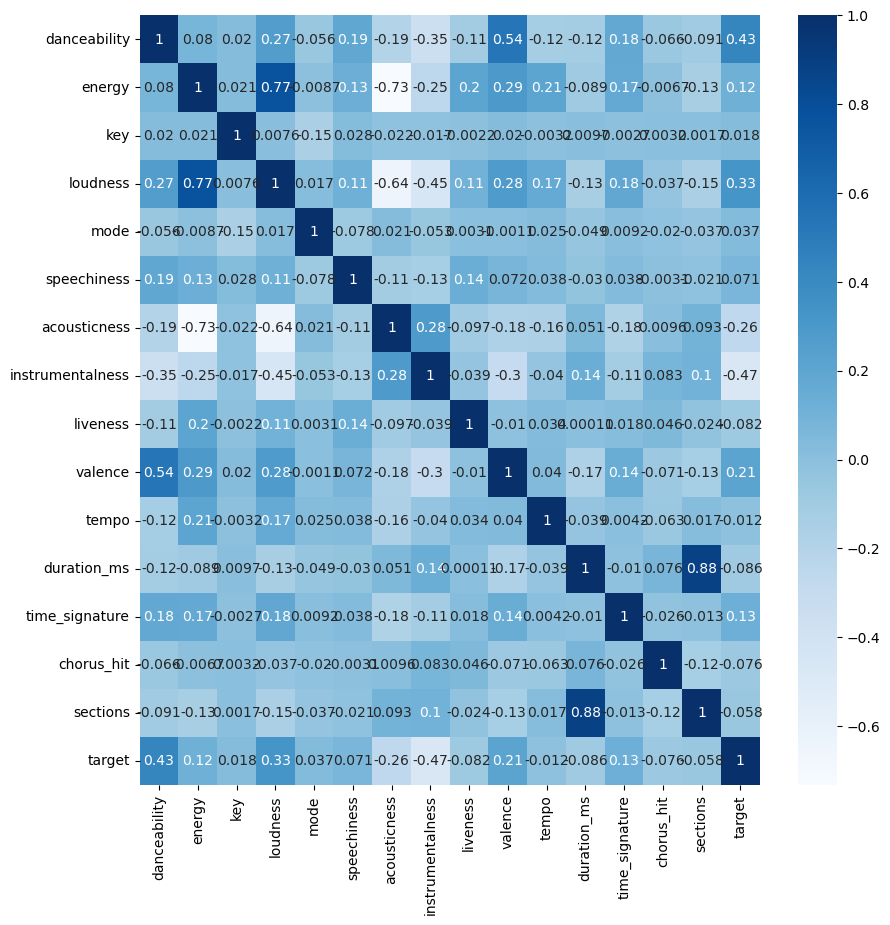

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cor, cmap = "Blues", annot = True )

In [20]:
df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [21]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']

target = ['target']

In [22]:
X = df[features]
y = df[target]

In [23]:
X.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6
1,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16
2,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9
3,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10
4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20


In [24]:
y.head(5)

,target
0,0
1,1
2,0
3,0
4,0


Com a base pronta vamos de fato iniciar a parte de machine learning 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.3, random_state= 42)

In [27]:
print("Features X_train", X_train.shape)
print("Features X_teste", X_test.shape)
print("Target y_train", y_train.shape)
print("Target y_teste", y_test.shape)

Features X_train (12153, 15)
Features X_teste (5209, 15)
Target y_train (12153, 1)
Target y_teste (5209, 1)


In [28]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [29]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(2604, 15)
(2605, 15)
(2604, 1)
(2605, 1)


## Validação K fold
No primeiro momento vamos ver como gerenciar o processo K fold na mão, ou seja, gerenciando todo o processo 

In [30]:
from sklearn.model_selection import KFold

In [31]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.3, random_state= 42)

In [33]:
for train_index, test_index in kfold.split(X_train):
  X_train_fold = X_train.iloc[train_index]
  X_test_fold = X_train.iloc[test_index]
  print(test_index)
  # proximos passos treinar o modelo com conjunto dde treino 
  # aplicar o modelo no conjunto de teste
  # medir o resultado no fold......

[    0     3     8 ... 12146 12151 12152]
[   10    12    20 ... 12122 12137 12147]
[   15    26    27 ... 12142 12145 12148]
[    2     6     7 ... 12141 12143 12149]
[    1     4     5 ... 12136 12139 12150]


##**K fold na biblioteca do sklearn **
Vamos aprender como o sklearn  pode gerenciar todo o processo.
Antes de executar propriamente dito vamos definir alguns conceito de acurácia e logo depois iniciar a etapa de treinamento do modelo

In [35]:
from sklearn.model_selection import cross_val_score
##### 

## **Métricas de avaliação para modelos de classificação**
### Acurácia: 
-A acurácia é uma métrica de avaliação que avaliar a proporções de acerto do modelo
- Ela é definidad matemáticamente como Auracia = (predicoes corretas) / todas as predicoes
- Vantagem é que ela é facil de compreender. Porém em caso de dados desbalanceados se torna desvantajoso como por exemplo em fraudes em bases de dados as tentativas de fraudes são menores que os não fraude então se olhar apenas a proporção a acurácia não seria um bom contexto.

### Matriz de confusão
- Como o nome diz é uma matriz que compara os resultados informados pelo modelo na diagona principal temos o informado pelo modelo e o que ele de fato acertou então temos na diagonal principal o valor verdadeiro e o modelo também informou verdadeiro também temos o valor falso e que o modelo indicou falso ja na diagonal secundária temos o que o modelo errou ou seja era um falso e o modelo apontou como verdadeiro e no lugar que era verdadeiro ele indicou como falso.
Com a matriz de confusão podemos calcular as seguintes métricas 

### Métricas baseadas na matriz de confusão
 -VP = Verdadeiro Positivo
 -FP = Falso Positivo
 -FN = Falso Negativo
 -VN = Verdadeiro Negativo

acuracia     = (VP + VN) / (VP + FP + FN + VN)
precisao     = VP / (VP + FP)
revocacao    = VP / (VP + FN)
especificidade = VN / (VN + FP)
f1_score     = 2 * (precisao * revocacao) / (precisao + revocacao)



In [36]:
from sklearn.model_selection import cross_val_score

## Métricas de classificação
Para entender como calcular as métricas via sklearn.metrics vamos montar um exemplo sintético criando dois vetores um chamado y_true e o outro y_pred é uma pequena simulação de um modelo sintético para fins de explicação.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [42]:
y_true = [0,1,0,1,1,1,0,0,1,0]
y_pred = [0,1,0,0,1,0,0,0,0,0]

In [43]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Acuracia: ", accuracy)
print(f"precision", precision)
print(f"recall", recall)
print(f"f1", f1)


Acuracia:  0.7
precision 1.0
recall 0.4
f1 0.5714285714285714


In [44]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_true, y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

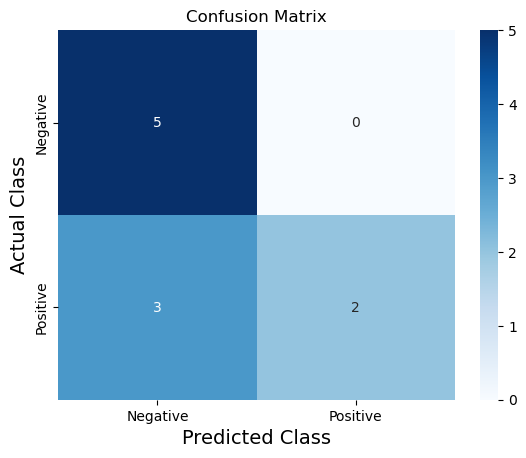

In [48]:
ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels= ["Negative", "Positive"], yticklabels=["Negative", "Positive"])
ax.set_xlabel("Predicted Class", fontsize = 14)
ax.set_ylabel("Actual Class", fontsize = 14)
ax.set_title("Confusion Matrix")

## **Metricas de avaliação AUC - ROC**

#### O que é a AUC (Área sob a curva ROC)?

AUC significa "Área Under the Curve" (área sob a curva ROC). 

Ela mede a capacidade do modelo de distinguir entre classes positivas e negativas.

 A curva ROC (Receiver Operating Characteristic) mostra a relação entre:
- TPR (Taxa de Verdadeiros Positivos) = VP / (VP + FN)
- FPR (Taxa de Falsos Positivos) = FP / (FP + VN)

#### O que é a curva ROC?

É um gráfico que mostra como o modelo se comporta à medida que mudamos o limiar (threshold) de decisão.

Ela compara:
  - TPR (True Positive Rate) = Sensibilidade
  - FPR (False Positive Rate)
 - Mede a capacidade do modelo em distinguir entre classes
 - AUC = 1 → modelo perfeito
 - AUC = 0.5 → modelo aleatório
 - AUC < 0.5 → modelo pior que aleatório (classificações invertidas)

### Curva AUC PR 
O que é a curva PR?

A curva PR (Precision-Recall) mostra a relação entre:
  - Precisão = VP / (VP + FP)
  - Revocação (ou Recall) = VP / (VP + FN)

Ela é especialmente útil em problemas com **classes desbalanceadas** (por exemplo, poucos 'Hits').

O que é AUC-PR?

AUC-PR (Area Under the Precision-Recall Curve) é a **área sob a curva PR**.
Ela mede o desempenho do modelo focando apenas na classe positiva.

Interpretação:

- Quanto **maior** a AUC-PR, **melhor** o modelo está em encontrar os positivos com **baixa taxa de falso positivo**.
- AUC-PR = 1.0 → modelo perfeito
- AUC-PR próximo da proporção de positivos na base → modelo fraco

Exemplo:

Suponha que 10% das músicas da base são "Hit".
Se o modelo tiver uma AUC-PR de **0.85**, isso indica que:
  "O modelo está muito acima de um modelo aleatório (que teria AUC-PR ≈ 0.10)."

Útil quando os falsos positivos importam muito e os dados são desbalanceados.

In [ ]:
model = #modelo aqui 

scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")